In [16]:
import pandas as pd

data = pd.read_csv('wine.csv')

In [17]:
import numpy as np

X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
          'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
          'pH', 'sulphates']]

y = data['quality']

y = np.where(y > 5, 1, 0)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [184]:
from sklearn import preprocessing

X_train = preprocessing.scale(X_train, with_mean=False)
X_test = preprocessing.scale(X_test, with_mean=False)

# 0.734

In [193]:
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

# 0.756

In [46]:
binarizer = preprocessing.Binarizer().fit(X)

X_train = binarizer.transform(X_train)
X_test = binarizer.transform(X_test)

# 0.525

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

k_array = [3, 4, 5, 6, 7, 8, 9]
k_accuracy = [0.74, 0.771, 0.734, 0.8, 0.790, 0.803, 0.806]

sel = SelectKBest(chi2, k=9)

sel.fit(X, y)
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

sel.scores_

# 0.803 k=8
# 0.806 k=9
# 0.790 k=7  !!!
# 0.8 k=6
# 0.734 k=5
# 0.771 k=4
# 0.74 k=3

# with scale 0.793

array([5.26525668e+00, 1.00297102e+01, 5.66670287e+00, 5.84022628e-03,
       4.85195914e-01, 4.20059068e+01, 2.00230590e+03, 1.44572025e-04,
       1.22551075e-04, 3.31761735e+00])

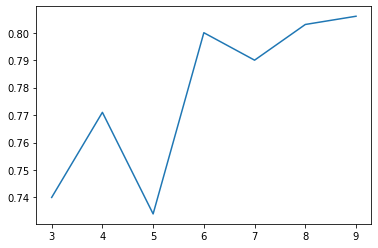

In [20]:
import matplotlib.pyplot as plt

plt.plot(k_array, k_accuracy)
plt.show()

In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

m = RFECV(RandomForestClassifier(n_estimators=500, random_state=1), scoring='accuracy',cv=3)
m.fit(X_train, y_train)

print(X_train.shape)

print(m.score(X_train, y_train))
      
X_train = m.transform(X_train)
X_test = m.transform(X_test)
X_train.shape
      
# 0.78
# with scale k=0.784

(1279, 10)
1.0


(1279, 7)

In [194]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

m = SelectFromModel(RandomForestClassifier(n_estimators=500, random_state=1))
m.fit(X_train, y_train)
print(X_train.shape)
X_train = m.transform(X_train)
X_test = m.transform(X_test)

X_train.shape

# 0.781
# with normalize 0.756

(1279, 10)


(1279, 4)

In [21]:
from sklearn.ensemble import RandomForestClassifier

# SVC(gamma='scale') - 0.628125
# SVC(gamma='auto') - 0.671875
# SVC(kernel='linear') - 0.725
# LinearSVC - 0.665625
# RandomForestClassifier - 0.8
#  RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0) - 0.79

clf = RandomForestClassifier(n_estimators=500, random_state=1)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [22]:
quality_prediction = clf.predict(X_test)


In [23]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, quality_prediction))


0.80625


In [24]:
quality_prediction

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,